In [2]:

import tensorflow as tf
#importing mnist data set
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
def weights(shape2):
  var= tf.truncated_normal(shape2,stddev=0.1)
  return tf.Variable(var)
def bias(shape1):
  var=tf.constant(0.1,shape=shape1)
  return tf.Variable(var)
X=tf.placeholder(tf.float32,[None,784],name='X')
Y=tf.placeholder(tf.float32,[None,10],name='Y')
dropout=0.75
keep_prob=tf.placeholder(tf.float32)

In [0]:
def conv2d(x,W):
  return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')
#ksize = kernel size
def pooling(x):
  return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')


In [0]:
#first convoluion layer
#[frame_height,frame_width,number_of_channel,number_of_filter]
w1=weights([5,5,1,16])
b1=bias([16])

#tensorflow conv2d function expects a 4d tensor with dimention corresponds to 
#batch_size, height,width,no. channel
image=tf.reshape(X,[-1,28,28,1])
#relu function is used to remove the negative pixel values from the result
#------------(not varified bias is added to reflect the some greay color-------------
conv1=tf.nn.relu(conv2d(image,w1)+b1)
#conv1 dimention ==[-1,28,28,32]
pool1=pooling(conv1)
#pool1 dimention ==[-1,14,14,32]


#second convolution layer
w2=weights([5,5,16,36])
b2=bias([36])
conv2=tf.nn.relu(conv2d(pool1,w2)+b2)
#dimentions==[-1,14,14,64]     
pool2=pooling(conv2)
#dimention==[-1,7,7,64]

# fully connected layers
#first fully connected layer with 1024 nerons


weight_fc1=weights([7*7*36,1024])
bias_fc1=bias([1024])

pool2_flat=tf.reshape(pool2,[-1,7*7*36])
fc1=tf.nn.relu(tf.matmul(pool2_flat,weight_fc1) + bias_fc1)
layer_drop=tf.nn.dropout(fc1,keep_prob)

#second fully connected layer

weight_fc2=weights([1024,10])
bias_fc2=bias([10])

fc2= tf.matmul(layer_drop,weight_fc2) + bias_fc2
#need not to use the softmax function to produce the vector of 10 units
#cost will contain that function


In [6]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=fc2))

optimize=tf.train.AdamOptimizer(1e-4).minimize(cost)

prediction=tf.equal(tf.argmax(fc2,1) , tf.argmax(Y,1))

#tf.cast convert the boolean array into the ones and zeros 

accuracy=tf.reduce_mean(tf.cast(prediction,tf.float32))

predict=tf.equal(tf.argmax(fc2,1),tf.argmax(Y,1)) 

accu=tf.reduce_mean(tf.cast(predict,tf.float32))


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



iteration 0 loss 5.9784074  Accuracy 0.14
iteration 100 loss 0.6700228  Accuracy 0.76
iteration 200 loss 0.38502026  Accuracy 0.88
iteration 300 loss 0.2083779  Accuracy 0.96
iteration 400 loss 0.19608551  Accuracy 0.98
iteration 500 loss 0.28681907  Accuracy 0.92
iteration 600 loss 0.33626178  Accuracy 0.88
iteration 700 loss 0.12165939  Accuracy 1.0
iteration 800 loss 0.12650433  Accuracy 0.94
iteration 900 loss 0.25068006  Accuracy 0.92
iteration 1000 loss 0.07121873  Accuracy 0.98
iteration 1100 loss 0.05888826  Accuracy 0.98
iteration 1200 loss 0.039596662  Accuracy 1.0
iteration 1300 loss 0.11275922  Accuracy 0.98
iteration 1400 loss 0.11891041  Accuracy 0.96
iteration 1500 loss 0.07752806  Accuracy 0.98
iteration 1600 loss 0.08271964  Accuracy 0.98
iteration 1700 loss 0.09647239  Accuracy 0.98
iteration 1800 loss 0.038808547  Accuracy 1.0
iteration 1900 loss 0.02363852  Accuracy 1.0
iteration 2000 loss 0.07729358  Accuracy 0.98
iteration 2100 loss 0.11781866  Accuracy 0.96
itera

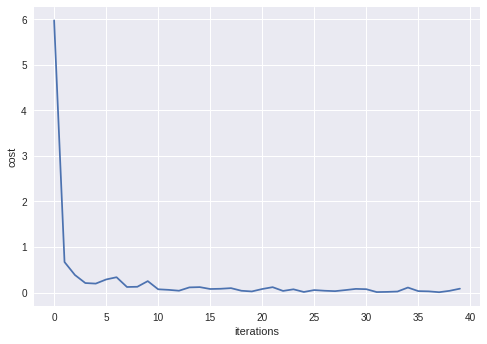

In [7]:
import matplotlib.pyplot as plt
sess=tf.Session()
sess.run(tf.global_variables_initializer())
costlist=[]
for i in range(4000):
    #batch_size==100
    batch_x,batch_y=mnist.train.next_batch(50)
    sess.run(optimize,feed_dict={X:batch_x,Y:batch_y,keep_prob:dropout})
    if i%100==0:
      minibatch_loss,minibatch_accuracy=sess.run([cost,accuracy],feed_dict={X:batch_x,Y:batch_y,keep_prob:1.0})
      print("iteration",str(i),"loss",minibatch_loss," Accuracy",minibatch_accuracy)
      costlist.append(minibatch_loss)    
num=[]
for j in range(40):
  num.append(j)
plt.plot(num,costlist)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

In [8]:
img1=mnist.test.images
print(sess.run(accu,feed_dict={X:img1,Y:mnist.test.labels,keep_prob:1.0}))

0.9843


In [0]:
def plot_image(image):
    plt.imshow(image.reshape(img_shape),
               interpolation='nearest',
               cmap='binary')

    plt.show()

prediction 8


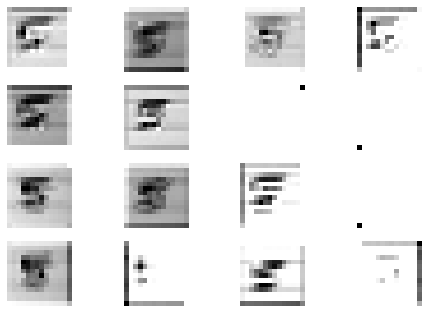

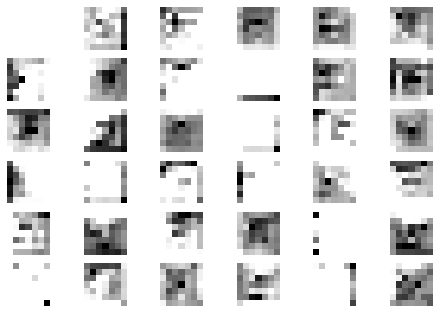

In [29]:
import numpy as np
import scipy
from PIL import Image
from scipy import ndimage
img = np.invert(Image.open("IMG_20190103_184147_28x28.jpg").convert('L')).ravel()
#my_image = "IMG_20190101_171859.jpeg"
#img=mnist.test.images[10]
#fname = my_image
#image1 = np.array(ndimage.imread(image, flatten=False))
#my_image = scipy.misc.imresize(image, size=(28,28)).reshape((1, 64 * 64 * 3)).T
#my_image_prediction = predict(my_image, parameters)
#plt.imshow(image1)
#plt.show(img)
prediction1 = sess.run(tf.argmax(fc2,1), feed_dict={X:[img],keep_prob:1.0})
print("prediction",np.squeeze(prediction1))
plot_conv_layer(layer=pool1, image=img)
plot_conv_layer(layer=pool2, image=img)

In [0]:
import math
def plot_conv_layer(layer, image):
    # Assume layer is a TensorFlow op that outputs a 4-dim tensor
    # which is the output of a convolutional layer,
    # e.g. layer_conv1 or layer_conv2.

    # Create a feed-dict containing just one image.
    # Note that we don't need to feed y_true because it is
    # not used in this calculation.
    feed_dict = {X: [image]}

    # Calculate and retrieve the output values of the layer
    # when inputting that image.
    values = sess.run(layer, feed_dict=feed_dict)

    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()